In [1]:
import sys, os
sys.path.append(os.getcwd())

In [2]:
!pip install deepchem rdkit
!pip install xgboost

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw

No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
No normalization for NumAmideBonds. Feature removed!
No normalization for NumAtomStereoCenters. Feature removed!
No normalization for NumBridgeheadAtoms. Feature removed!
No normalization for NumHeterocycles. Feature removed!
No normalization for NumSpiroAtoms. Feature removed!
No normalization for NumUnspecifiedAtomStereoCenters. Feature removed!
No normalization for Phi. Feature removed!
/Users/suki/mamba/envs/main_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'dgl'
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [4]:
%load_ext autoreload
%autoreload 2
import featurizers
import baseline_regression_models

In [6]:
df=pd.read_csv('bace.csv')

In [7]:
df

,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,53.205711,78.640335,226.855410,107.434910,37.133846,0.000000,7.980170,0.000000,0.000000,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,73.817162,47.171600,365.676940,174.076750,34.923889,7.980170,24.148668,0.000000,24.663788,2
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,Train,8.698970,591.74091,2.5499,4,3,11,...,70.365707,47.941147,192.406520,255.752550,23.654478,0.230159,15.879790,0.000000,24.663788,3
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,BACE_4,1,Train,8.698970,591.67828,3.1680,4,3,12,...,56.657166,37.954151,194.353040,202.763350,36.498634,0.980913,8.188327,0.000000,26.385181,4
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5,1,Train,8.698970,629.71283,3.5086,3,3,11,...,78.945702,39.361153,179.712880,220.461300,23.654478,0.230159,15.879790,0.000000,26.100143,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,Clc1cc2nc(n(c2cc1)C(CC(=O)NCC1CCOCC1)CC)N,BACE_1543,0,Test,3.000000,364.86969,2.5942,3,2,6,...,37.212799,37.681076,180.226410,95.670128,30.107586,9.368159,7.980170,0.000000,0.000000,1543
1509,Clc1cc2nc(n(c2cc1)C(CC(=O)NCc1ncccc1)CC)N,BACE_1544,0,Test,3.000000,357.83731,2.8229,3,2,6,...,45.792797,47.349350,122.401500,99.877144,30.107586,9.368159,7.980170,0.000000,0.000000,1544
1510,Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1,BACE_1545,0,Test,2.953115,320.18451,3.0895,2,1,2,...,47.790600,22.563574,96.290794,58.798935,20.071724,9.368159,0.000000,6.904104,0.000000,1545
1511,O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N,BACE_1546,0,Test,2.733298,317.38440,3.8595,2,1,3,...,77.219978,9.316234,95.907784,112.609720,20.071724,9.368159,0.000000,6.904104,0.000000,1546


In [8]:
df.describe()

,Class,pIC50,MW,AlogP,HBA,HBD,RB,HeavyAtomCount,ChiralCenterCount,ChiralCenterCountAllPossible,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
count,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,...,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000
mean,0.456709,6.521991,479.661988,3.177080,3.732981,2.001322,8.049570,34.089227,0.522802,2.317250,...,52.348846,48.763740,181.835580,148.442348,30.371697,3.488650,11.740560,1.239762,14.387597,783.779907
std,0.498287,1.342417,122.083053,1.396633,1.444778,1.629343,4.741135,8.520088,1.162539,1.612558,...,25.993800,18.201519,99.717702,60.548833,12.162452,5.148336,9.073406,3.293804,13.329890,444.468806
min,0.000000,2.544546,138.187000,-4.361100,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,...,0.000000,-3.551821,1.916970,-5.536391,-2.216191,-7.286308,-6.106466,-7.379991,-1.273524,1.000000
25%,0.000000,5.585027,389.331300,2.335500,3.000000,0.000000,4.000000,28.000000,0.000000,1.000000,...,34.319988,36.547150,102.233770,102.510450,20.132990,0.000000,7.980170,0.000000,0.000000,407.000000
50%,0.000000,6.761954,463.628300,3.171300,4.000000,2.000000,7.000000,33.000000,0.000000,2.000000,...,51.479984,47.624382,171.917220,140.683620,30.107586,0.550130,8.188327,0.000000,21.710098,788.000000
75%,1.000000,7.540000,564.639530,4.015500,4.000000,3.000000,11.000000,40.000000,1.000000,3.000000,...,66.553795,58.844093,253.679080,185.659260,37.133846,7.980170,15.879790,0.000000,24.663788,1167.000000
max,1.000000,10.522879,1350.473300,7.617400,12.000000,15.000000,40.000000,97.000000,10.000000,12.000000,...,161.342860,124.272730,865.473330,378.516270,121.671900,29.823961,80.218018,16.681131,61.659470,1547.000000


In [9]:
df_bace=df[['mol','pIC50']]

In [10]:
df_bace

,mol,pIC50
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,9.154901
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,8.853872
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,8.698970
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,8.698970
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,8.698970
...,...,...
1508,Clc1cc2nc(n(c2cc1)C(CC(=O)NCC1CCOCC1)CC)N,3.000000
1509,Clc1cc2nc(n(c2cc1)C(CC(=O)NCc1ncccc1)CC)N,3.000000
1510,Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1,2.953115
1511,O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N,2.733298


In [11]:
def canonicalize_smiles(smiles):
        '''This function takes a non-canonical SMILES and
        returns the canonical version
        Args:
            -smiles: str, non-canonical SMILES of a molecule
        Out:
            - canonical_smiles: str, canonical SMILES of the molecule
        '''

        mol = Chem.MolFromSmiles(smiles) # create a mol object from input smiles

        canonical_smiles = Chem.MolToSmiles(mol) # convert the previous mol object to SMILES using Chem.MolToSmiles()


        return canonical_smiles


    # apply canonical smiles to our df
df_bace['canonical_smiles'] = df_bace['mol'].apply(canonicalize_smiles)


/var/folders/rc/zrvj_cr13ys6j_8bn4myqkqw0000gn/T/ipykernel_1995/4287560437.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bace['canonical_smiles'] = df_bace['mol'].apply(canonicalize_smiles)


In [12]:
df_bace

,mol,pIC50,canonical_smiles
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,9.154901,Cc1ccccc1-c1ccc2nc(N)c(C[C@@H](C)C(=O)N[C@@H]3...
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,8.853872,CCCO[C@H]1C[NH2+][C@@H]([C@@H](O)[C@H](Cc2cc(F...
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,8.698970,CCc1cn2c3c(cc(C(=O)N[C@@H](Cc4ccccc4)[C@H](O)C...
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,8.698970,CCOC[C@@H](Oc1cc(C[C@@H]2CS(=O)(=O)C[C@H]([NH2...
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,8.698970,CCc1cn2c3c(cc(C(=O)N[C@@H](Cc4ccccc4)[C@H](O)C...
...,...,...,...
1508,Clc1cc2nc(n(c2cc1)C(CC(=O)NCC1CCOCC1)CC)N,3.000000,CCC(CC(=O)NCC1CCOCC1)n1c(N)nc2cc(Cl)ccc21
1509,Clc1cc2nc(n(c2cc1)C(CC(=O)NCc1ncccc1)CC)N,3.000000,CCC(CC(=O)NCc1ccccn1)n1c(N)nc2cc(Cl)ccc21
1510,Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1,2.953115,Cn1c(N)nc(C2CC2c2cccc(Br)c2)cc1=O
1511,O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N,2.733298,Cn1c(N)nc(C2CC2c2cccc(-c3ccccc3)c2)cc1=O


<Axes: >

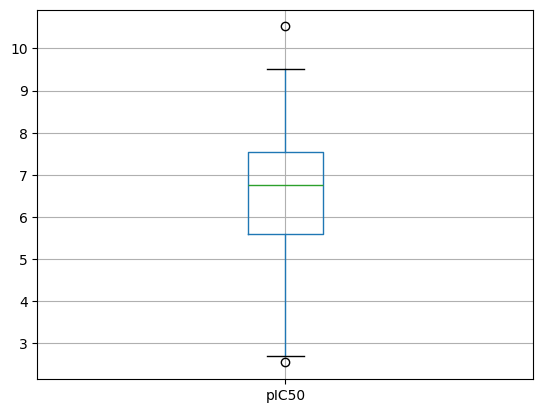

In [13]:
df_bace.boxplot(column='pIC50')

In [14]:
    num_rows = len(df_bace)
    num_unique_smiles = df_bace['canonical_smiles'].nunique()

    print(f"\nTotal number of rows in the DataFrame: {num_rows}")
    print(f"\nNumber of unique canonical SMILES: {num_unique_smiles}\n")

    # drop old 'smiles' column
    df_bace = df_bace.drop(columns='mol')


    print(f"\n--- BACE Preprocessing Report ---\n")
    print(f"Final dataset size: {df_bace.shape}\n")



Total number of rows in the DataFrame: 1513

Number of unique canonical SMILES: 1513


--- BACE Preprocessing Report ---

Final dataset size: (1513, 2)



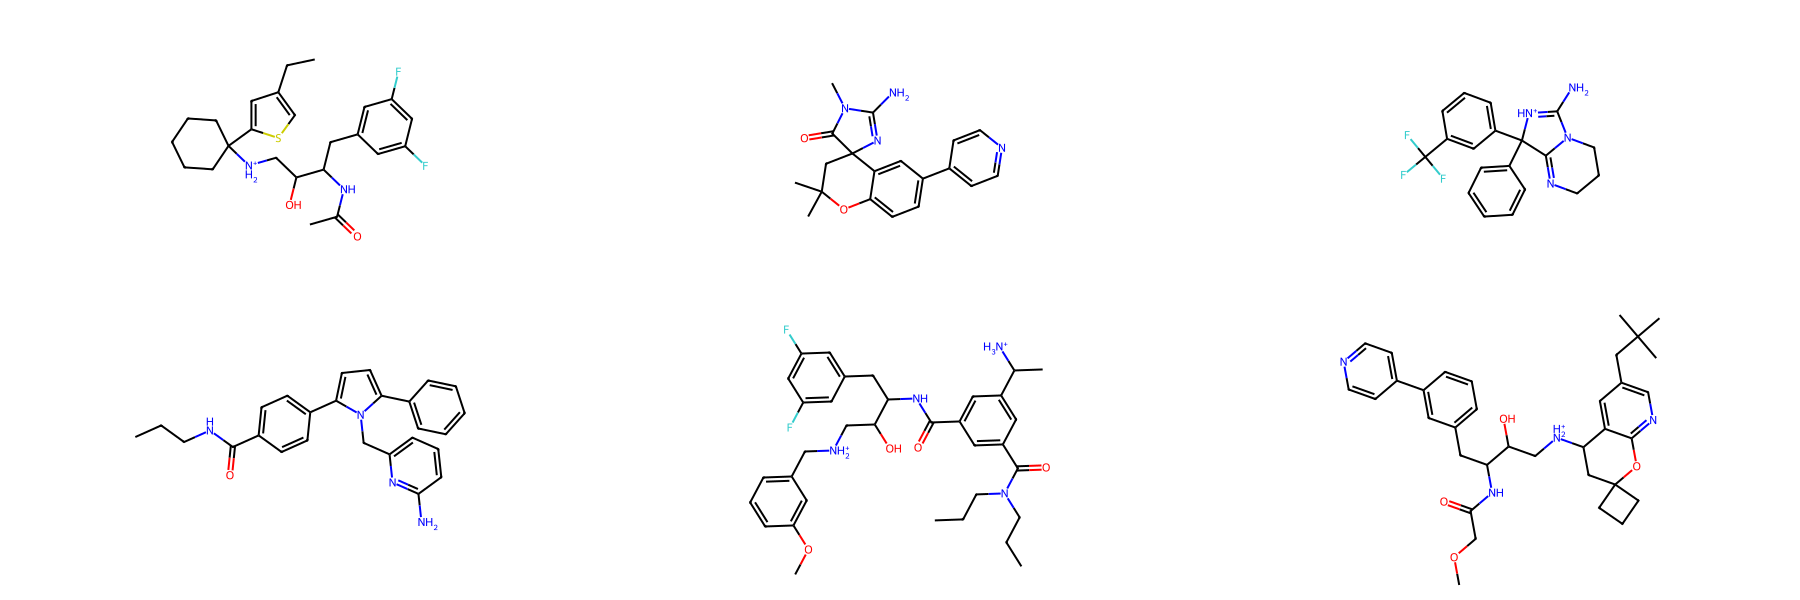

In [15]:

# Visualize some of the molecules of this dataset
n=6
df_sample=df_bace.sample(n)

smiles = df_sample['canonical_smiles'].values
legend = df_sample['pIC50'].values
molecs = [Chem.MolFromSmiles(s) for s in smiles]

Draw.MolsToGridImage(
    molecs,
    subImgSize=(600,300),
)

In [16]:
total_na_values = df_bace.isna().sum().sum()
print(f"\nTOTAL number of Na in the DataFrame: {total_na_values}")
non_numeric_df = df_bace.select_dtypes(exclude=np.number)
print("\nNon-Numeric Columns (Categorical/Objects):")
print(non_numeric_df.columns.tolist())


TOTAL number of Na in the DataFrame: 0

Non-Numeric Columns (Categorical/Objects):
['canonical_smiles']


In [17]:
df_bace

,pIC50,canonical_smiles
0,9.154901,Cc1ccccc1-c1ccc2nc(N)c(C[C@@H](C)C(=O)N[C@@H]3...
1,8.853872,CCCO[C@H]1C[NH2+][C@@H]([C@@H](O)[C@H](Cc2cc(F...
2,8.698970,CCc1cn2c3c(cc(C(=O)N[C@@H](Cc4ccccc4)[C@H](O)C...
3,8.698970,CCOC[C@@H](Oc1cc(C[C@@H]2CS(=O)(=O)C[C@H]([NH2...
4,8.698970,CCc1cn2c3c(cc(C(=O)N[C@@H](Cc4ccccc4)[C@H](O)C...
...,...,...
1508,3.000000,CCC(CC(=O)NCC1CCOCC1)n1c(N)nc2cc(Cl)ccc21
1509,3.000000,CCC(CC(=O)NCc1ccccn1)n1c(N)nc2cc(Cl)ccc21
1510,2.953115,Cn1c(N)nc(C2CC2c2cccc(Br)c2)cc1=O
1511,2.733298,Cn1c(N)nc(C2CC2c2cccc(-c3ccccc3)c2)cc1=O


In [18]:
features = featurizers.featurize_molecules(df=df_bace,
    methods=["rdkit", "ecfp","maccs"],smiles_col="canonical_smiles",
    target_col="pIC50",concatenate=False)

RDKIT features shape before cleaning: (1513, 217)
RDKIT features shape after cleaning: (1513, 192)


[21:13:17] DEPRECATION WARNING: please use MorganGenerator
[21:13:17] DEPRECATION WARNING: please use MorganGenerator
[21:13:17] DEPRECATION WARNING: please use MorganGenerator
[21:13:17] DEPRECATION WARNING: please use MorganGenerator
[21:13:17] DEPRECATION WARNING: please use MorganGenerator
[21:13:17] DEPRECATION WARNING: please use MorganGenerator
[21:13:17] DEPRECATION WARNING: please use MorganGenerator
[21:13:17] DEPRECATION WARNING: please use MorganGenerator
[21:13:17] DEPRECATION WARNING: please use MorganGenerator
[21:13:17] DEPRECATION WARNING: please use MorganGenerator
[21:13:17] DEPRECATION WARNING: please use MorganGenerator
[21:13:17] DEPRECATION WARNING: please use MorganGenerator
[21:13:17] DEPRECATION WARNING: please use MorganGenerator
[21:13:17] DEPRECATION WARNING: please use MorganGenerator
[21:13:17] DEPRECATION WARNING: please use MorganGenerator
[21:13:17] DEPRECATION WARNING: please use MorganGenerator
[21:13:17] DEPRECATION WARNING: please use MorganGenerat

ECFP features shape before cleaning: (1513, 1024)
ECFP features shape after cleaning: (1513, 1016)
MACCS features shape before cleaning: (1513, 167)
MACCS features shape after cleaning: (1513, 142)


In [19]:
features['rdkit'].columns

Index(['canonical_smiles', 'pIC50', 'rdkit_0', 'rdkit_1', 'rdkit_2', 'rdkit_3',
       'rdkit_4', 'rdkit_5', 'rdkit_6', 'rdkit_7',
       ...
       'rdkit_182', 'rdkit_183', 'rdkit_184', 'rdkit_185', 'rdkit_186',
       'rdkit_187', 'rdkit_188', 'rdkit_189', 'rdkit_190', 'rdkit_191'],
      dtype='object', length=194)

In [20]:
concatenated_features= featurizers.featurize_molecules(df=df_bace,
    methods=["rdkit", "ecfp","maccs"],concatenate=True)

RDKIT features shape before cleaning: (1513, 217)
RDKIT features shape after cleaning: (1513, 192)


[21:13:31] DEPRECATION WARNING: please use MorganGenerator
[21:13:31] DEPRECATION WARNING: please use MorganGenerator
[21:13:31] DEPRECATION WARNING: please use MorganGenerator
[21:13:31] DEPRECATION WARNING: please use MorganGenerator
[21:13:31] DEPRECATION WARNING: please use MorganGenerator
[21:13:31] DEPRECATION WARNING: please use MorganGenerator
[21:13:31] DEPRECATION WARNING: please use MorganGenerator
[21:13:31] DEPRECATION WARNING: please use MorganGenerator
[21:13:31] DEPRECATION WARNING: please use MorganGenerator
[21:13:31] DEPRECATION WARNING: please use MorganGenerator
[21:13:31] DEPRECATION WARNING: please use MorganGenerator
[21:13:31] DEPRECATION WARNING: please use MorganGenerator
[21:13:31] DEPRECATION WARNING: please use MorganGenerator
[21:13:31] DEPRECATION WARNING: please use MorganGenerator
[21:13:31] DEPRECATION WARNING: please use MorganGenerator
[21:13:31] DEPRECATION WARNING: please use MorganGenerator
[21:13:31] DEPRECATION WARNING: please use MorganGenerat

ECFP features shape before cleaning: (1513, 1024)
ECFP features shape after cleaning: (1513, 1016)
MACCS features shape before cleaning: (1513, 167)
MACCS features shape after cleaning: (1513, 142)
Final concatenated feature matrix shape: (1513, 1352)


In [21]:
features['rdkit'].columns

Index(['canonical_smiles', 'pIC50', 'rdkit_0', 'rdkit_1', 'rdkit_2', 'rdkit_3',
       'rdkit_4', 'rdkit_5', 'rdkit_6', 'rdkit_7',
       ...
       'rdkit_182', 'rdkit_183', 'rdkit_184', 'rdkit_185', 'rdkit_186',
       'rdkit_187', 'rdkit_188', 'rdkit_189', 'rdkit_190', 'rdkit_191'],
      dtype='object', length=194)

In [22]:
results_base_models, trained_base_models=baseline_regression_models.run_base_regressors(features)

Running models for featurizer: rdkit
Applied Standard scaling (continuous features detected).
Training RandomForest...
Training XGBoost...
Training SVR...
Running models for featurizer: ecfp
 Skipping scaling (binary fingerprint detected).
Training RandomForest...
Training XGBoost...
Training SVR...
Running models for featurizer: maccs
 Skipping scaling (binary fingerprint detected).
Training RandomForest...
Training XGBoost...
Training SVR...
Finished training all models.
  Featurizer         Model        R2      RMSE
5       ecfp           SVR  0.779342  0.614983
3       ecfp  RandomForest  0.698100  0.719340
4       ecfp       XGBoost  0.691204  0.727510
8      maccs           SVR  0.676656  0.744450
6      maccs  RandomForest  0.645817  0.779142
7      maccs       XGBoost  0.613675  0.813728
2      rdkit           SVR  0.722589  0.689549
0      rdkit  RandomForest  0.718793  0.694251
1      rdkit       XGBoost  0.718096  0.695110


In [ ]:
cv_results, best_models = baseline_regression_models.run_base_regressors_kv(features)

In [24]:
grid_search_results, grid_models=baseline_regression_models.run_gridsearch(features)

 Featurizer: rdkit
Scaling applied.
 Featurizer: ecfp
Skipping scaling (binary features).
 Featurizer: maccs
Skipping scaling (binary features).
 Finished GridSearchCV for all models.
  Featurizer         Model                                        Best_Params  \
5       ecfp           SVR  {'model__C': 3.0, 'model__epsilon': 0.1, 'mode...   
4       ecfp       XGBoost  {'model__learning_rate': 0.1, 'model__max_dept...   
3       ecfp  RandomForest  {'model__max_depth': None, 'model__n_estimator...   
8      maccs           SVR  {'model__C': 3.0, 'model__epsilon': 0.2, 'mode...   
6      maccs  RandomForest  {'model__max_depth': 10, 'model__n_estimators'...   
7      maccs       XGBoost  {'model__learning_rate': 0.1, 'model__max_dept...   
2      rdkit           SVR  {'model__C': 3.0, 'model__epsilon': 0.2, 'mode...   
1      rdkit       XGBoost  {'model__learning_rate': 0.1, 'model__max_dept...   
0      rdkit  RandomForest  {'model__max_depth': 20, 'model__n_estimators'...   

     